In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime


In [313]:
dataset = pd.read_csv('TCS_stock_history.csv') 
# Replace with the correct path to your dataset
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.sort_values(by='Date', inplace=True)
dataset.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [314]:
# Check for null values
print(dataset.isnull().sum())
# Convert numeric columns if required
dataset['Open'] = pd.to_numeric(dataset['Open'], errors='coerce')
dataset['High'] = pd.to_numeric(dataset['High'], errors='coerce')
dataset['Low'] = pd.to_numeric(dataset['Low'], errors='coerce')
dataset['Close'] = pd.to_numeric(dataset['Close'], errors='coerce')
# Fill any remaining NaN values
# Forward fill
dataset.ffill(inplace=True)

# Or backward fill
dataset.bfill(inplace=True)

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


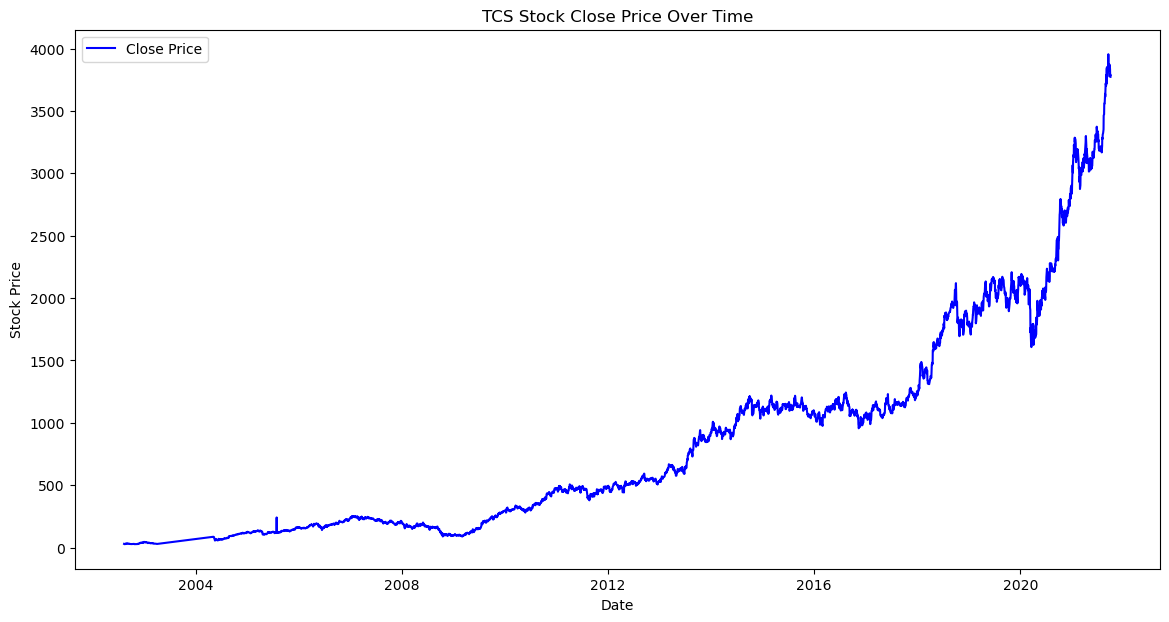

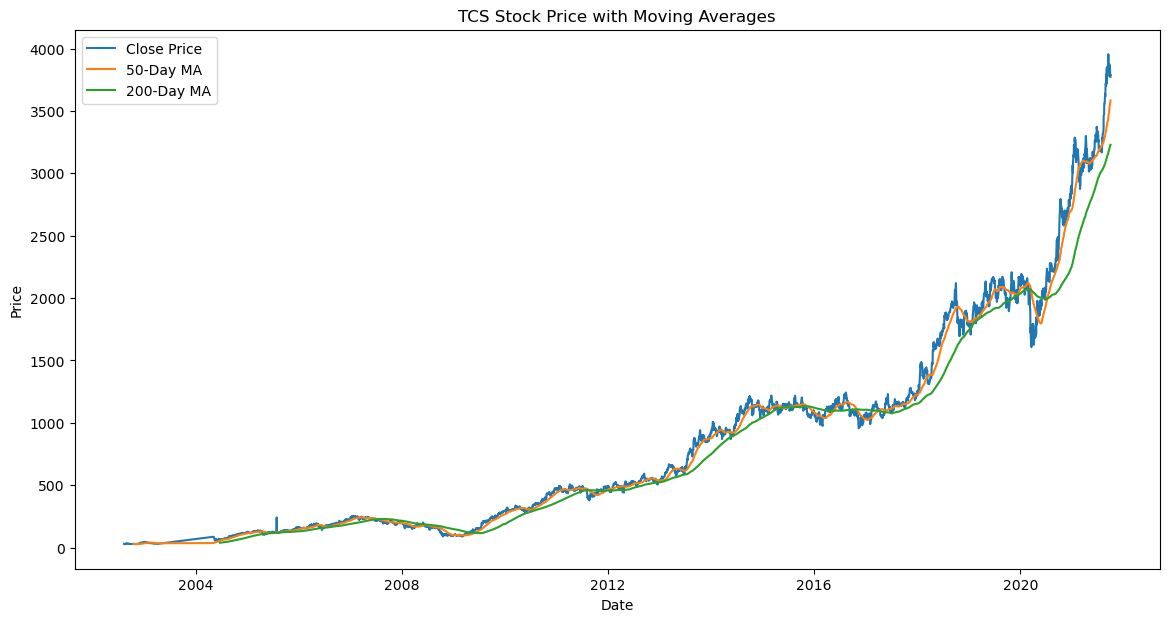

In [315]:
# Plotting Close price over time
plt.figure(figsize=(14, 7))
plt.plot(dataset['Date'], dataset['Close'], color='blue',
label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()
# Calculating 50-day and 200-day moving averages
dataset['MA50'] = dataset['Close'].rolling(window=50).mean()
dataset['MA200'] = dataset['Close'].rolling(window=200).mean()
# Plot with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(dataset['Date'], dataset['Close'], label='Close Price')
plt.plot(dataset['Date'], dataset['MA50'], label='50-Day MA')
plt.plot(dataset['Date'],dataset['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

In [316]:
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day
dataset['Day_of_Week'] = dataset['Date'].dt.dayofweek
# Lag Features
dataset['Prev_Close'] = dataset['Close'].shift(1)
dataset.dropna(inplace=True) 
# Drop rows with NaN values from shifting


In [317]:
# Feature selection
X =dataset[['Open', 'High', 'Low', 'Volume', 'Prev_Close',
'Day_of_Week', 'Month']]
y =dataset['Close']
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test,
y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 39.049929985230136
R-Squared Score: 0.9999438356582193


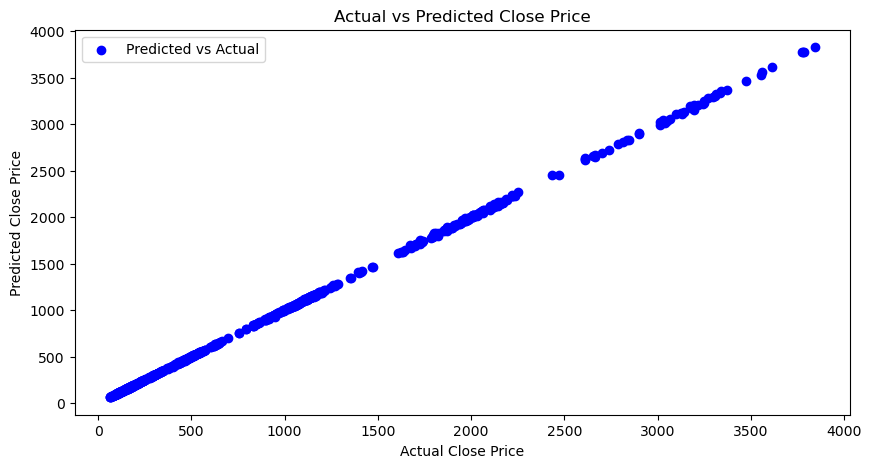

In [318]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [319]:
import pickle

with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [321]:
dataset = pd.read_csv("TCS_stock_history.csv")

dataset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [322]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [323]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [324]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset = dataset.sort_values(by='Date')

In [325]:
dataset.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


In [326]:
corel=dataset.corr()
corel

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [327]:
correlation_with_close = dataset.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


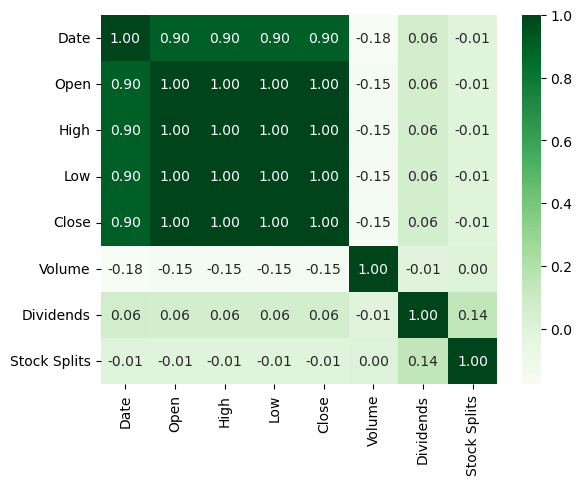

In [328]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

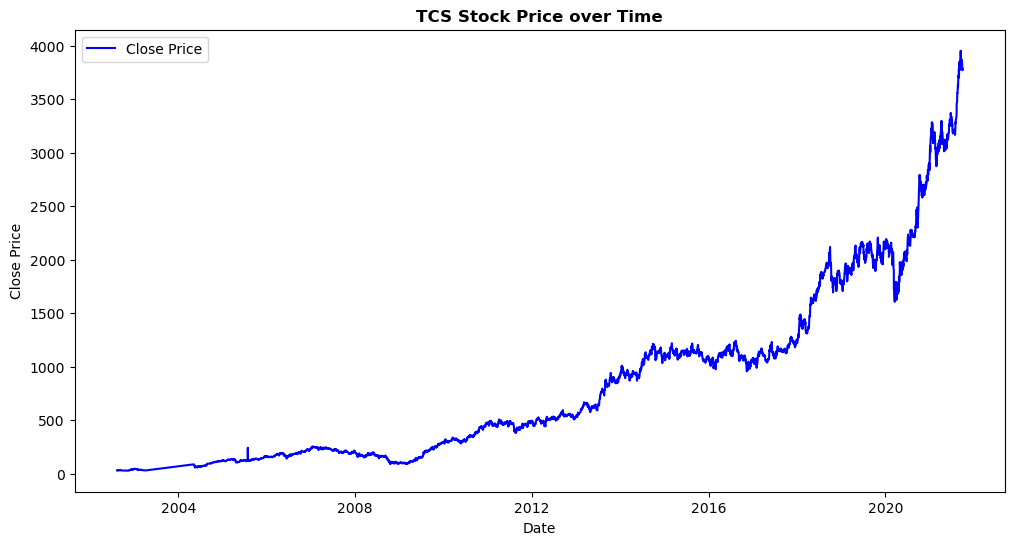

In [329]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'], dataset['Close'], label='Close Price',
color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()

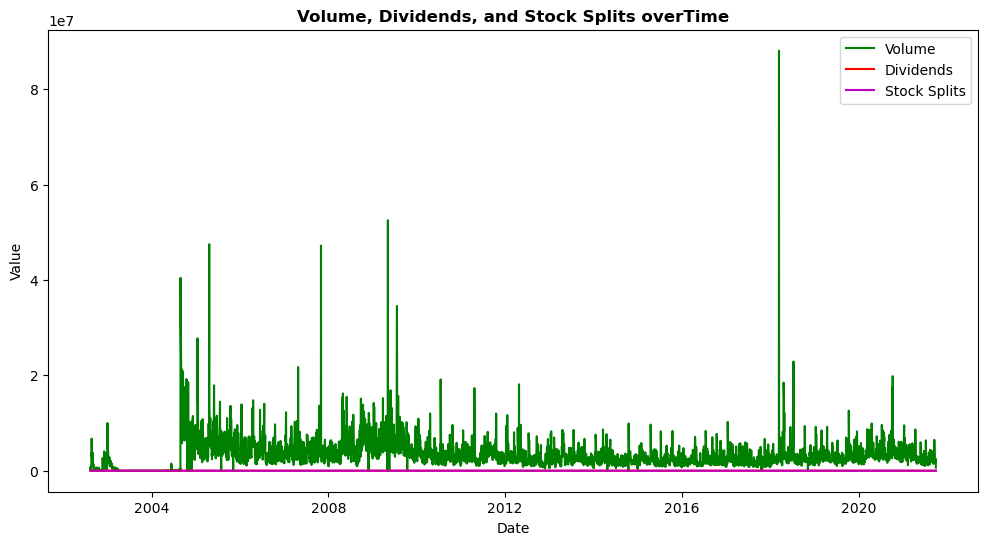

In [330]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'], dataset['Volume'], label='Volume', color='g')
plt.plot(dataset['Date'], dataset['Dividends'], label='Dividends',color='r')
plt.plot(dataset['Date'], dataset['Stock Splits'], label='Stock Splits',color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits overTime',weight = "bold")
plt.legend()
plt.show()

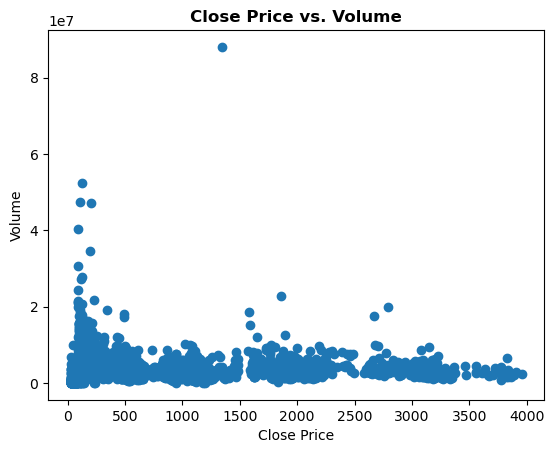

In [331]:
plt.scatter(dataset['Close'], dataset['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

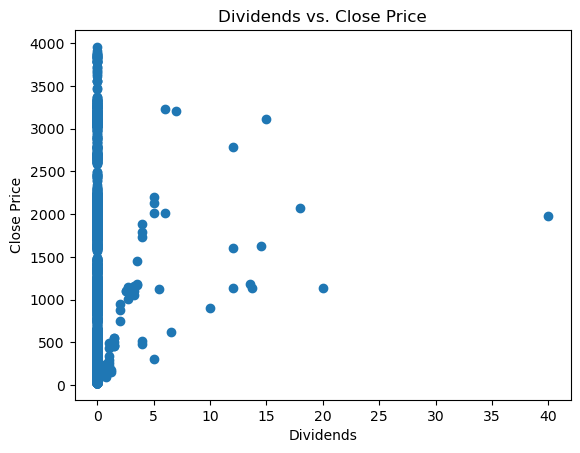

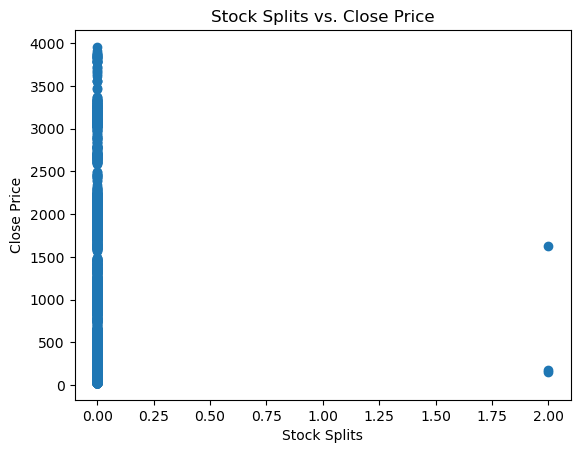

In [332]:
plt.scatter(dataset['Dividends'], dataset['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()
# Stock Splits vs. Close Price
plt.scatter(dataset['Stock Splits'], dataset['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

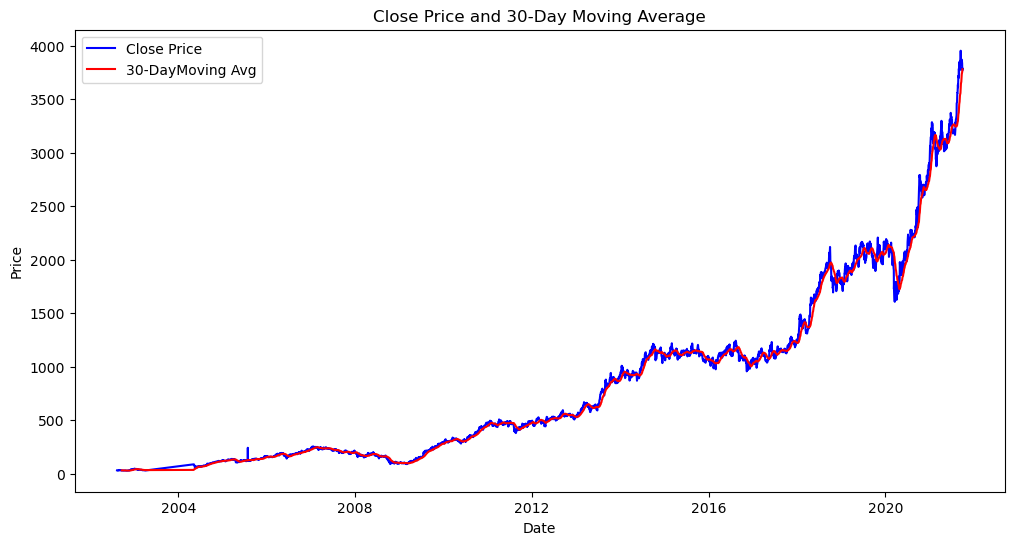

In [333]:
dataset['30-Day Moving Avg'] = dataset['Close'].rolling(window=30).mean()
# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'], dataset['Close'], label='Close Price',color='b')
plt.plot(dataset['Date'], dataset['30-Day Moving Avg'], label='30-DayMoving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

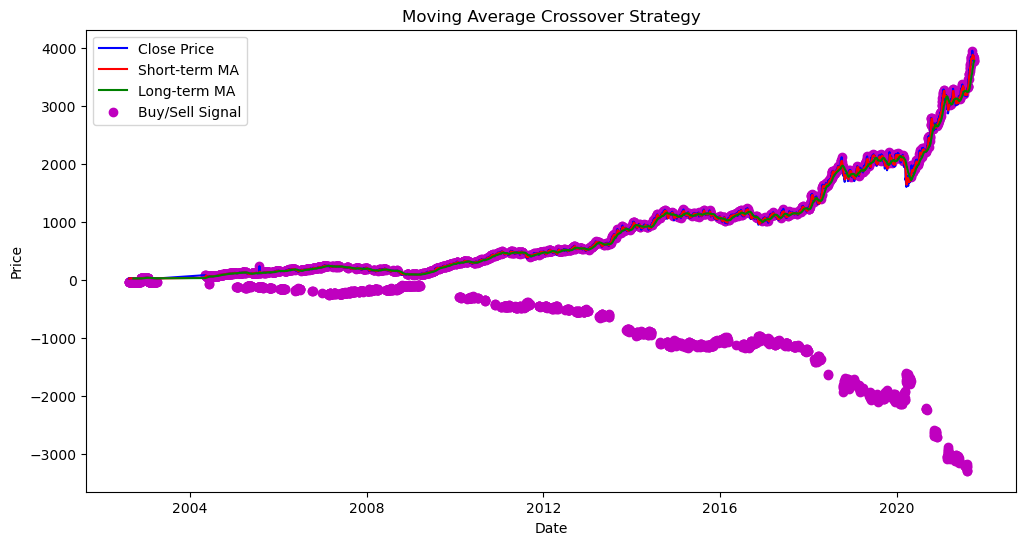

In [334]:
dataset['Short_MA'] = dataset['Close'].rolling(window=5).mean()
dataset['Long_MA'] =dataset['Close'].rolling(window=30).mean()
# Creating a trading signals based on moving average crossovers
dataset['Signal'] = np.where(dataset['Short_MA'] > dataset['Long_MA'], 1, -1)
# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'], dataset['Close'], label='Close Price',color='b')
plt.plot(dataset['Date'], dataset['Short_MA'], label='Short-term MA',color='r')
plt.plot(dataset['Date'], dataset['Long_MA'], label='Long-term MA',color='g')
plt.scatter(dataset['Date'],dataset['Close'] *dataset['Signal'],label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

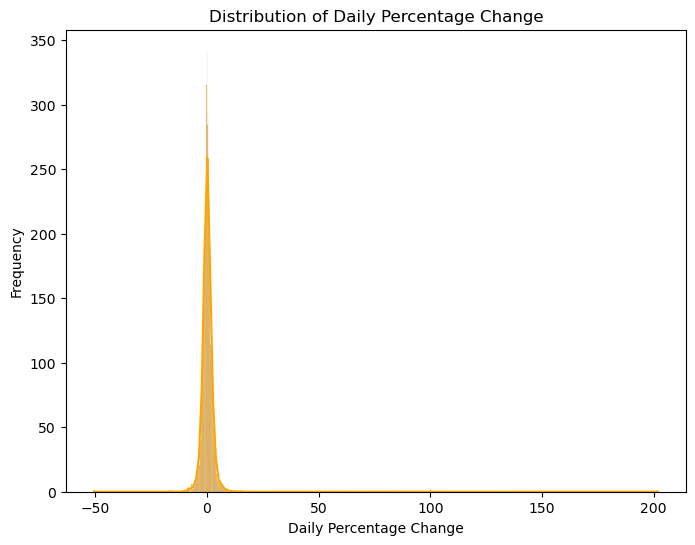

In [335]:
dataset['Daily_Price_Change'] = dataset['Close'].pct_change() * 100
# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Daily_Price_Change'].dropna(), kde=True,color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [336]:
dataset['Moving_Avg_Close'] = dataset['Close'].rolling(window=7).mean()

In [337]:
dataset.shape

(4463, 14)

In [338]:
# Prepare the data for LSTM
X_train = dataset['Close'].values.reshape(-1, 1)
y_train = dataset['Close'].shift(-1).dropna().values
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Define the test data
test_ratio = 0.2
test_size = int(len(dataset) * test_ratio)
test_data = dataset[-test_size:]
# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [339]:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

In [340]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
# Set the number of epochs and batch size
epochs = 30
batch_size = 15
# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
model.train_on_batch(X_batch, y_batch)
# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|██████████| 30/30 [00:00<00:00, 3904.58it/s]


In [341]:
lstm_predictions = model.predict(X_test_lstm).flatten()

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step 


In [342]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

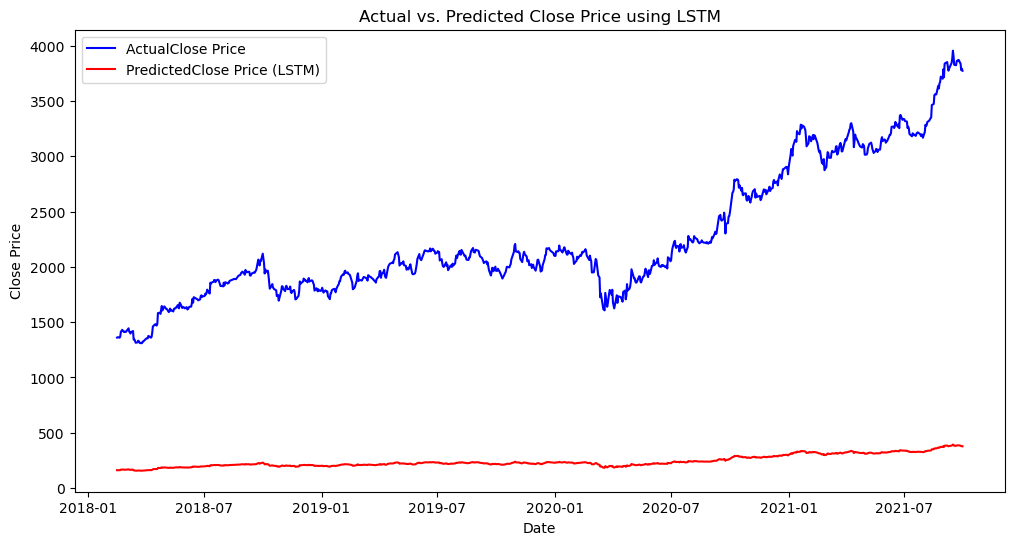

In [343]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='ActualClose Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='PredictedClose Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

In [344]:
lstm_mae = mean_absolute_error(test_data['Close'],lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 2015.2412478357153


In [345]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
date_index = test_data.index[-len(lstm_predictions):]
predictions_df = pd.DataFrame({'Date': date_index,'Predicted_Close': lstm_predictions.flatten()})
predictions_df.to_csv('predictions.csv', index=False)